In [1]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import json

# Where should I work?

Every year thousands of newly graduated Computer Science students begin the long and arduous journey of attempting to find a job. However, the field of Computer Science is rather large and different concentrations emerge that focus on different sects of Computer Science.

An interrogation of jobs posted on Indeed should reveal interesting information regarding the number of jobs in each city, each company and what are the most in demand languages.

No updated or curated dataset of computer science jobs exists online, therfore I created the dataset myself by querying the Indeed api, the queries were based on a hand crafted list of cities and keywords.

In [2]:
df = pd.read_json('jobs.json')

In [3]:
len(df)

199582

In [4]:
df.head()

,jobtitle,company,city,state,country,language,formattedLocation,source,date,snippet,...,jobkey,sponsored,expired,indeedApply,formattedLocationFull,formattedRelativeTime,stations,refNum,keywords,advertiserId
0,"Bioinformatics Software Engineer, Production",Invitae,San Francisco,CA,US,en,"San Francisco, CA",InVitae,2021-03-31 00:41:21+00:00,Experience with Javascript frameworks such as ...,...,6fe3246003f0a2be,False,False,True,"San Francisco, CA 94107",8 days ago,,3029156,"[docker, javascript, bash]",NaN
1,iOS Lead,Rdio,San Francisco,CA,US,en,"San Francisco, CA",Rdio,2018-11-05 07:32:51+00:00,"Python, Java, Objective-C, JavaScript and Erla...",...,96407f75975a6cb0,False,False,True,"San Francisco, CA",2 years ago,,JL8193381111,"[swift, ios, android, java, javascript]",NaN
2,Senior Software Engineer II (Fullstack) - Vouc...,Uber,San Francisco,CA,US,en,"San Francisco, CA",Uber,2021-03-16 08:18:59+00:00,"Javascript, C++, Java, Python, or Go. Uber Vou...",...,23f9b7a73d200fbc,False,False,False,"San Francisco, CA 94103",22 days ago,,101262,"[node.js, c++, css, golang, angular, java, jav...",NaN
3,Senior Full Stack Developer,IBM,San Francisco,CA,US,en,"San Francisco, CA",IBM,2021-03-25 17:42:25+00:00,Software Developers at IBM are the backbone of...,...,a971331608ecbb66,False,False,False,"San Francisco, CA",13 days ago,,81488419,"[node.js, c++, angular, java, nosql, javascript]",NaN
4,Machine Learning Developer,The Blue Store,San Francisco,CA,US,en,"San Francisco, CA",Indeed,2021-02-12 00:00:01+00:00,"Use Python to design, implement and test autom...",...,61e0fa40e15cda82,False,False,True,"San Francisco, CA 94103",30+ days ago,,42583631-41-41,"[node.js, c++, c#, spark, tensorflow, java, ja...",42583631.0


The dataset includes ~200 thousand unique computer science job postings from around the US, it includes useful information including, job title, company, location, job description, and job url.

To optimize performace the descriptions have been shortened to snippets and the language keywords have been pulled out, this will make data analysis in pandas easier, however a seperate analysis was completed on the full descriptions using spark but that will shown at the end.

# Top Cities/Companies/Titles

In [5]:
df.groupby('city').jobtitle.count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,city,count
2148,New York,9279
2828,Seattle,6157
2748,San Francisco,6023
136,Austin,5469
529,Chicago,5294
122,Atlanta,4246
292,Boston,3964
694,Dallas,3313
3306,Washington,3147
1755,Los Angeles,2965


In [6]:
df.groupby('state').jobtitle.count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,state,count
5,CA,36097
44,TX,17858
35,NY,13685
47,WA,10489
46,VA,10114
21,MA,9034
16,IL,8289
11,FL,8002
22,MD,7439
28,NC,6535


Using pandas groupby feature we are able to extract interesting information regarding the state of the computer science field in the United States.

The top ten cities may come as no suprise, with New York in a commanding 1st with 50% more jobs than 2nd place Seattle. Los Angeles comes in much lower at 10th than anticipated with only 2965 jobs, this potentially could be skewed as many jobs near Los Angeles in its surrounding cities that many would still regard as an LA job is not included in this count.

Despite New York City being the city with the most jobs the state of NY is only 3rd with 13k jobs. California has more jobs than 2nd and 3rd combined at 36k. While only 2 Californian cities made it in the top 10 cities by jobs it dominates at the state level, this means the jobs in California are more spread out amonst the cities. This makes sense, while most states like Texas or New York might have 1 tech hub in the state California has multiple, to name a few: San Francisco, Los Angeles, San Diego, San Jose etc.



In [7]:
df[df['state']== 'CA'].groupby('city').jobtitle.count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,city,count
357,San Francisco,6023
219,Los Angeles,2965
353,San Diego,2767
361,San Jose,2390
376,Santa Clara,1522
176,Irvine,1446
413,Sunnyvale,1356
292,Palo Alto,1331
258,Mountain View,951
135,Fremont,616


In [8]:
df.groupby('company').jobtitle.count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,company,count
8987,Deloitte,4380
1886,Amazon.com Services LLC,4246
1885,"Amazon Web Services, Inc.",2953
16175,KPMG,1852
1876,"Amazon Dev Center U.S., Inc.",1381
31593,VMware,1236
19047,Microsoft,1235
8586,DaVita,1180
11081,Facebook,1131
27409,Splunk,943


In [9]:
df.groupby('jobtitle').jobtitle.count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,jobtitle,count
80332,Software Engineer,2818
72235,Senior Software Engineer,2052
78373,Software Developer,1027
17755,Data Engineer,834
20517,DevOps Engineer,826
51103,Pharmacy Technician,739
18727,Data Scientist,679
95379,Systems Administrator,644
37947,Java Developer,585
29759,Full Stack Developer,531


The companies that had posted the most computer science jobs did suprise me, while the top spot is occupied by a company called Deloitte in actuality the company with the most jobs is Amazon, but its jobs got split between company names such as Amazon.com Services LLC, Amazon Web Services, Inc., and Amazon Dev Center U.S., Inc. The two companies I did not recognize Deloitte and DaVita appear to be contracting companies which would explain their large number of job postings.

The job titles with the most openings were Software Engineer, Senior Software Engineer, and Software Developer as they are the most broad. However a factor that impacted this analysis was the large number of job titles that contained additinal info like Software Engineer - Remote | Java. Which would effect its ability to be grouped.

# Most Popular skill by City

In [10]:
df['keywords']

0                                [docker, javascript, bash]
1                   [swift, ios, android, java, javascript]
2         [node.js, c++, css, golang, angular, java, jav...
3          [node.js, c++, angular, java, nosql, javascript]
4         [node.js, c++, c#, spark, tensorflow, java, ja...
                                ...                        
199577                                         [tensorflow]
199578                                          [expressjs]
199579                                          [expressjs]
199580                                          [expressjs]
199581                                          [expressjs]
Name: keywords, Length: 199582, dtype: object

In [11]:
keyword_dict = {}
def count_keywords(keyword):
    for item in keyword:
        if item in keyword_dict:
            keyword_dict[item] += 1
        else:
            keyword_dict[item] = 1

In [12]:
df.keywords.map(count_keywords)
keyword_dict = dict(sorted(keyword_dict.items(), key=lambda item: item[1], reverse=True))
print(keyword_dict)

{'python': 43745, 'java': 37204, 'linux': 37015, 'javascript': 36401, 'aws': 33404, 'azure': 29674, 'c++': 24467, 'html': 24170, 'css': 23528, 'c#': 23302, 'spark': 18877, 'docker': 18026, 'mysql': 12078, 'ruby': 11635, 'angular': 11561, 'nosql': 10925, 'perl': 9755, 'android': 9334, 'bash': 9259, 'hadoop': 9133, 'c': 9130, 'node.js': 7919, 'php': 7905, 'asp.net': 6031, 'jquery': 5742, 'scala': 5275, 'vba': 3834, 'tensorflow': 3778, 'vue': 3620, 'r': 2348, 'kotlin': 2305, 'golang': 2191, 'reactjs': 1980, 'swift': 1976, 'rust': 1934, 'django': 1657, 'mongo': 1609, 'ios': 1132, 'laravel': 696, 'clojure': 384, 'haskell': 353, 'lisp': 116, 'expressjs': 110}


The analysis of keywords was particular hard to do in pandas, as the number of keywords associated to each job could be a variable number from 1 - N (where N is the total number of keywords).

Python was the runaway leader for most in demand skill being listed in 43k jobs, followed by Java (37k) and linux (37k).

In [13]:
city_dict = {}
def count_keywords_per_city(row):
    if row['city'] not in city_dict:
        city_dict[row['city']] = {}
    for item in row['keywords']:        
        if item in city_dict[row['city']]:
            city_dict[row['city']][item] += 1
        else:
            city_dict[row['city']][item] = 1

In [18]:
topCitiesDF = df[df['city'].isin(['New York', 'Seattle', 'San Francisco', 'Austin', 'Chicago', 'Atlanta', 'Boston', 'Dallas', 'Washington', 'Los Angeles', 'Fort Collins'])]
topCitiesDF.apply(count_keywords_per_city, axis=1)
print(city_dict)


{'San Francisco': {'docker': 1518, 'javascript': 1756, 'bash': 434, 'swift': 300, 'ios': 230, 'android': 976, 'java': 1904, 'node.js': 714, 'c++': 1368, 'css': 1362, 'golang': 356, 'angular': 476, 'html': 1268, 'nosql': 858, 'c#': 682, 'spark': 1834, 'tensorflow': 450, 'mysql': 752, 'ruby': 1058, 'aws': 1984, 'php': 380, 'hadoop': 764, 'python': 2036, 'vue': 234, 'linux': 1614, 'reactjs': 134, 'jquery': 100, 'scala': 714, 'azure': 1424, 'kotlin': 412, 'c': 506, 'perl': 336, 'django': 232, 'lisp': 12, 'haskell': 40, 'clojure': 60, 'asp.net': 70, 'rust': 142, 'mongo': 54, 'r': 96, 'laravel': 20, 'vba': 142, 'expressjs': 8}, 'Dallas': {'node.js': 262, 'android': 264, 'java': 1236, 'javascript': 1344, 'css': 772, 'python': 1468, 'linux': 1256, 'azure': 1404, 'docker': 726, 'html': 980, 'aws': 1520, 'reactjs': 100, 'c#': 752, 'c': 272, 'ruby': 374, 'nosql': 484, 'angular': 492, 'vue': 102, 'perl': 336, 'jquery': 200, 'hadoop': 386, 'c++': 580, 'spark': 622, 'mysql': 400, 'scala': 200, 'bash

In [21]:
def plotData(data, maxNum,name):
    # Data to plot
    labels = []
    sizes = []
    counter = 0
    for x, y in data.items():
        if counter > maxNum:
            break
        labels.append(x)
        sizes.append(y)
        counter = counter + 1

    # Plot
    plt.pie(sizes, labels=labels)
    plt.title(name)

    plt.axis('equal')
    plt.show()

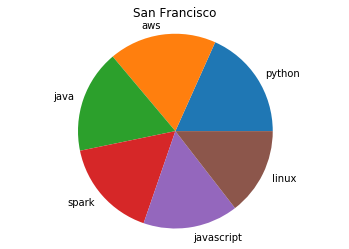

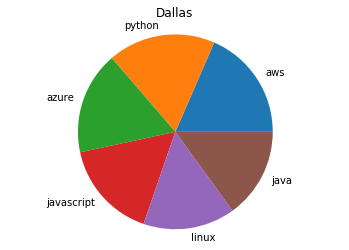

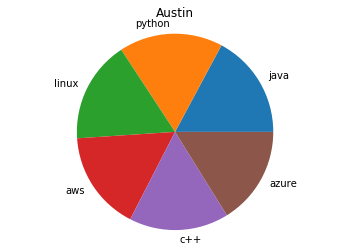

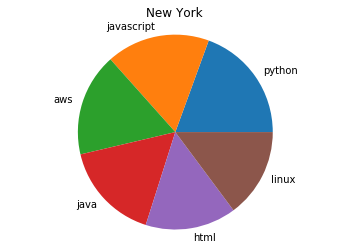

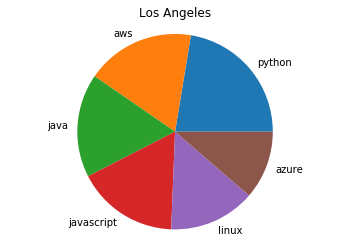

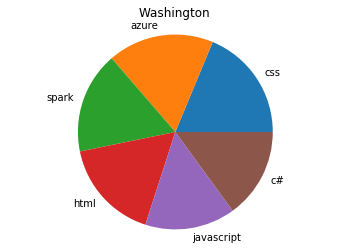

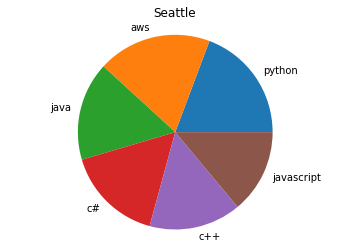

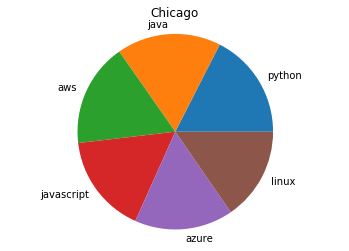

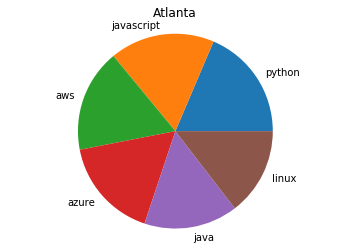

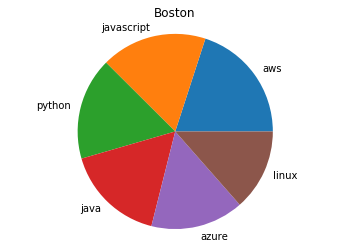

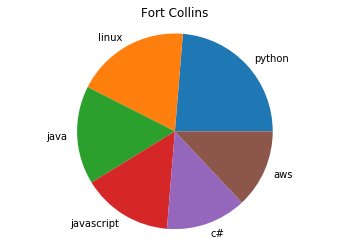

In [22]:
for key in city_dict:
    plotData(dict(sorted(city_dict[key].items(), key=lambda item: item[1], reverse=True)),5,key)

Using MatPlotLib we can graph out the top 5 most popular languages per city, the peranial top 3 of python, java and linux are in most cities but interesting languages such as C# appear often in Fort Collins. If you know C++ then Austin or Seattle is the city for you.

# Conclusion

Finding a job in todays market can be extremely difficult, and while online tools such as LinkedIn and Indeed can help guide your search, they are limited in their capabilities and the analsyis shown here today would be impossible through their front ends.

So the best way to find what language and city would best help you find a job is to aggregate a data set of jobs and run analysis on them as shown above, a great conversation starter at a new company is to tell them that you know you are the best fit for the job based on your analysis.

# Keyword Analysis with FPGrowth

While outisde the scope of this project I still wanted to find correlations between keywords, not only how often does each one appear but how do they effect each other.

For instance when a job posting has the keyword AWS how likely is Azure to follow, if a job posting as both C++ and C how likely is java to appear.

To accomplish this I used the dataset with full job descriptions (rather than snippets) using a cluster of 13 machines I submitted a spark job to run a FP growth algoritm (included in Pyspark). The analysis was done on a city by city basis such that the correlation value between AWS and Azure would be different in Fort Collins vs Los Angeles.
A sample record of the results looks like
aws,0.113636364,0,0,0,0,0.590909091,0.068181818,0.090909091,0.113636364,0.159090909,0,0,0,0.272727273,0.136363636,0.045454545,0,0,0,0.431818182,0.272727273,0,0,0.431818182,0,0.068181818,0.045454545,0,0.090909091,0,0,0.431818182,0.113636364,0.113636364,0,0,0,0.045454545,0.045454545,0,0

I threw this data into an sql database, along with a pretty front end of HTML,CSS and Javascript and I created the helpful website https://skillsadvisor.net